#**Zestaw danych - Mosty w Petersburgu (Pittsburgh Bridges)**
Zawiera 108 mostów zbudowanych w Petersburgu od 1818 roku. Każda konstrukcja jest opisana przez siedem właściwości specyfikacji (trzy ciągłe i cztery nominalne) oraz dla każdej konstrukcji podano pięć parametrów konstrukcyjnych.

Dataset zawiera 2 wersje:

* V1 zawiera oryginalne przykłady;
* V2 zawiera zamienione niektóre dane liczbowe w dane kategoryczne np. zamiast roku powstania mostu dowiadujemy się czy most jest stary, nowy czy średnio stary

##  **Atrybuty:**


**Specyfikacja:**

* id: Identyfiukator mostu.

* river/rzeka: Rzeka nad którą zbudowany jest most:
    `A : Allegheny,
    M : Monongahela,
    O : Ohio`

* location/lokalizajca: Lokalizacja mostu. `1 - 52`

* erected/zbudowany: Rok zbudowania mostu.  `1818 - 1986 `

    `CRAFTS: 1818 - 1866,
    EMERGING: 1870 - 1889,
    MATURE: 1890 - 1939,
    MODERN: 1945 - 1986`

* purpose/przeznaczenie: Funckja mostu.
    `WALK,
    AQUEDUCT,
    RR (Railroad),
    HIGHWAY`

* length/długość: Długość mostu  `804-4558`

    `SHORT : 804 - 990,
    MEDIUM : 1000 - 1850,
    LONG : 2000 - 4558`

* lanes/pasy: Pasy drogi na moście  `1, 2, 4 and 6`

* clear-g: Wymuszony prześwit pod mostem
    `N: Not Enforced,
    G: Enforced`

**Parametry konstrukcyjne**

* t-or-d: Położenie jezdni na moście.
    `THROUGH,
    DECK`

* material/materiał: Materiał dominujący mostu.
    `WOOD,
    IRON,
    STEEL`

* span/rozpiętość: Rozpiętość mostu.
    `SHORT,
    MEDIUM,
    LONG`

* rel-l: Względna długość rozpiętości mostu w stosunku do długości drogi(nie mam pojęcia jak to przetłumaczyć  
    `S: Short,
    S-F: Short-Full,
    F: Full`

* type/typ: Typ mostu.
    `WOOD,
    SUSPEN (Suspension),
    SIMPLE-T (Simple Truss),
    ARCH,
    CANTILEV (Cantilever),
    CONT-T (Continuous Truss)`

Źródło:

https://archive.ics.uci.edu/ml/datasets/Pittsburgh+Bridges

Reich, Yoram, and Steven J. Fenves. "The formation and use of abstract concepts in design." Concept Formation. Morgan Kaufmann, 1991. 323-353.
Reich, Yoram. "Combining nominal and continuous properties in an incremental learning system for design." (1989).


#Importowanie


In [ ]:
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, plot_confusion_matrix, f1_score
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn import metrics

In [ ]:
df1 = pd.read_csv("bridges1.csv")
df2 = pd.read_csv("bridges2.csv")
df2

,Id,river,location,erected,purpose,length,lanes,clear-g,t-or-d,material,span,rel-l,type
0,E1,M,3.0,CRAFTS,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39.0,CRAFTS,AQUEDUCT,NaN,1.0,N,THROUGH,WOOD,NaN,S,WOOD
3,E5,A,29.0,CRAFTS,HIGHWAY,MEDIUM,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23.0,CRAFTS,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,NaN,S,WOOD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,E84,A,24.0,MODERN,HIGHWAY,SHORT,6.0,G,THROUGH,STEEL,MEDIUM,F,ARCH
104,E91,O,44.0,MODERN,HIGHWAY,LONG,6.0,G,THROUGH,STEEL,LONG,F,ARCH
105,E90,M,7.0,MODERN,HIGHWAY,SHORT,6.0,G,THROUGH,STEEL,LONG,F,ARCH
106,E100,O,43.0,MODERN,HIGHWAY,NaN,NaN,G,NaN,NaN,NaN,F,NaN


#Wizualizacja

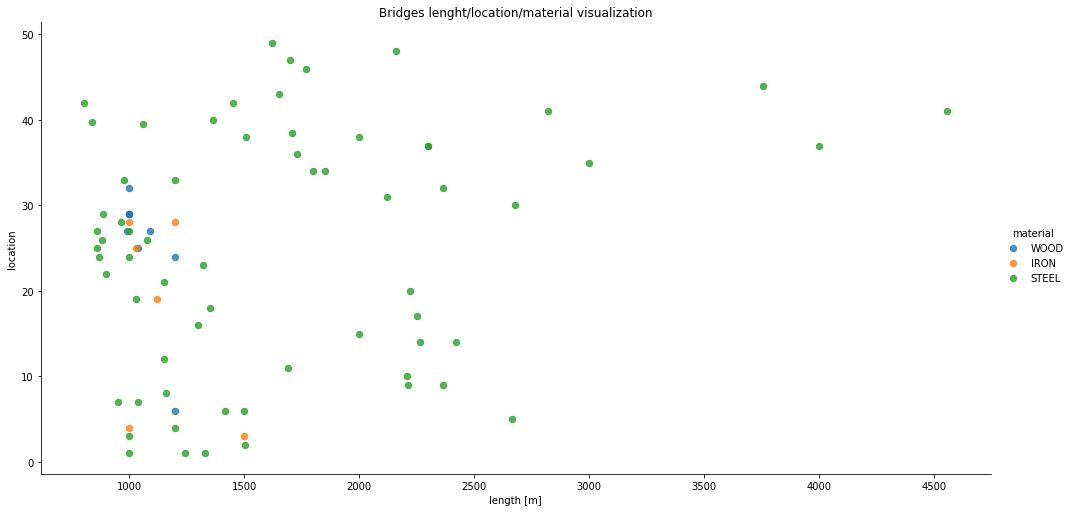

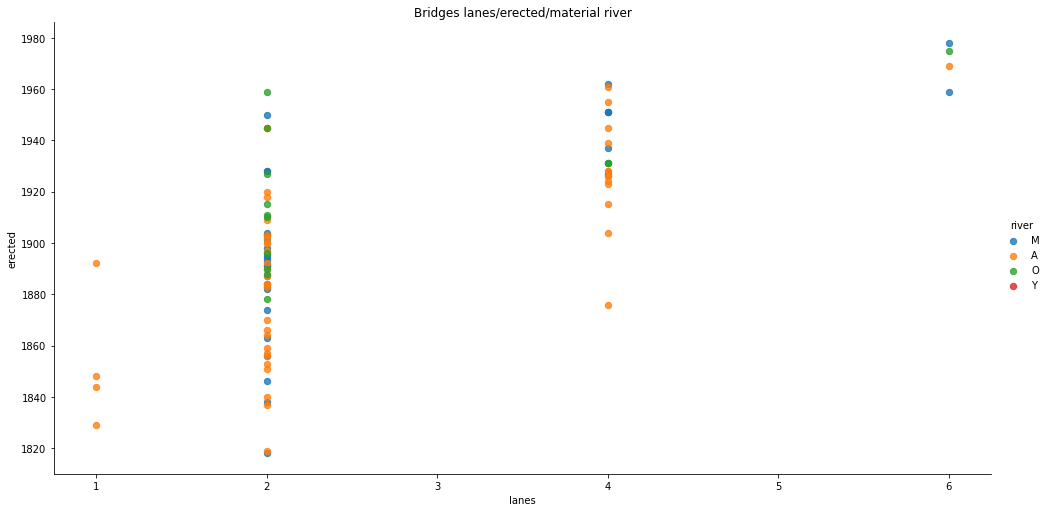

4


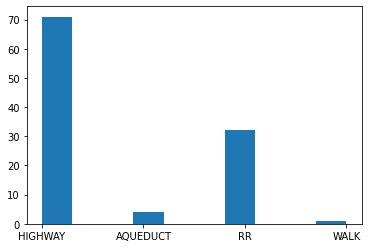

In [ ]:
sns.lmplot(data=df1, x='length', y='location', fit_reg=False, hue="material", scatter_kws={"marker": "D","s": 40}, height=7,aspect=12 / 6)
plt.title('Bridges lenght/location/material visualization')
plt.xlabel('length [m]')

plt.show()

sns.lmplot( x='lanes', y='erected',data=df1, fit_reg=False, hue="river", scatter_kws={"marker": "D","s": 40}, height=7,aspect=12 / 6)
plt.title('Bridges lanes/erected/material river')
plt.show()

print(len(df1["purpose"].unique()))
plt.hist(df1["purpose"])
plt.show()

#Przygotowanie

In [ ]:
X = df2.iloc[:, 1:8]
Y = df2.iloc[:, 8:]
print(X)
print(Y)

    river  location erected   purpose  length  lanes clear-g
0       M       3.0  CRAFTS   HIGHWAY     NaN    2.0       N
1       A      25.0  CRAFTS   HIGHWAY  MEDIUM    2.0       N
2       A      39.0  CRAFTS  AQUEDUCT     NaN    1.0       N
3       A      29.0  CRAFTS   HIGHWAY  MEDIUM    2.0       N
4       M      23.0  CRAFTS   HIGHWAY     NaN    2.0       N
..    ...       ...     ...       ...     ...    ...     ...
103     A      24.0  MODERN   HIGHWAY   SHORT    6.0       G
104     O      44.0  MODERN   HIGHWAY    LONG    6.0       G
105     M       7.0  MODERN   HIGHWAY   SHORT    6.0       G
106     O      43.0  MODERN   HIGHWAY     NaN    NaN       G
107     A      28.0  MODERN   HIGHWAY     NaN    NaN       G

[108 rows x 7 columns]
      t-or-d material    span rel-l  type
0    THROUGH     WOOD   SHORT     S  WOOD
1    THROUGH     WOOD   SHORT     S  WOOD
2    THROUGH     WOOD     NaN     S  WOOD
3    THROUGH     WOOD   SHORT     S  WOOD
4    THROUGH     WOOD     NaN     

Zamiana danych tekstowych na numeryczne

In [ ]:
order = {"river":{ "A" : 0., "M" : 1, "O" : 3,"Y":4},"erected":{"CRAFTS": 0, "EMERGING": 1, "MATURE": 2, "MODERN":3},"length":{ "SHORT" : 0, "MEDIUM" : 1, "LONG" : 2},"purpose":{ "WALK" : 0, "AQUEDUCT" : 1, "RR" : 2 , "HIGHWAY" : 3},"clear-g":{ "N" : 0, "G" : 1},\
         "t-or-d":{ "THROUGH" : 0, "DECK" : 1},"material":{ "WOOD": 0, "IRON": 1, "STEEL": 2},"span":{"SHORT": 0, "MEDIUM": 1, "LONG": 2 },"rel-l":{ "S" : 0, "S-F" : 1, "F" : 2},"type":{"WOOD":0, "SUSPEN":1, "SIMPLE-T":2, "ARCH":3, "CANTILEV":4, "CONT-T":5}}
def view_ord():
  global order
  for elem in order.items():
    print(elem)
for x in X:
  my_mapper = {}
  if(x=="lanes" or x == "location"):
    continue
  X[x]=X[x].map(order[x])
print(X.info())
for y in Y:
  my_mapper = {}
  Y[y]=Y[y].map(order[y])
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   river     108 non-null    float64
 1   location  107 non-null    float64
 2   erected   108 non-null    int64  
 3   purpose   108 non-null    int64  
 4   length    81 non-null     float64
 5   lanes     92 non-null     float64
 6   clear-g   106 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 6.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   t-or-d    102 non-null    float64
 1   material  106 non-null    float64
 2   span      92 non-null     float64
 3   rel-l     103 non-null    float64
 4   type      105 non-null    float64
dtypes: float64(5)
memory usage: 4.3 KB
None


Uzupełnienie pustych danych medianą

In [ ]:
Y = Y.fillna(Y.median())

In [ ]:
df2[df2['type'] == 'NIL']

,Id,river,location,erected,purpose,length,lanes,clear-g,t-or-d,material,span,rel-l,type
63,E107,A,39.0,MATURE,RR,NaN,NaN,G,NaN,STEEL,NaN,F,NIL


Widzimy, że posiadamy tylko jeden rekord z wartością NIL. Musimy go usunąć by nie zaburzał wyniku. Dodatkowo nie jest zapisany w opisie danych także prawdopodobnie jest to błąd. Usuwam również kolumnę location, gdyż znacznie utrudnia otrzymanie poprawnych wyników

In [ ]:
Y = Y.drop([63])
X = X.drop([63])
X = X.drop('location', axis=1)


In [ ]:
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 107
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   t-or-d    107 non-null    float64
 1   material  107 non-null    float64
 2   span      107 non-null    float64
 3   rel-l     107 non-null    float64
 4   type      107 non-null    float64
dtypes: float64(5)
memory usage: 5.0 KB
None


Klasyfikacja danych

In [ ]:
i= Y.groupby(["t-or-d","material","span","rel-l","type"]).mean()
mapa=[]
for i in (i.index):
  mapa.append(list(i))
print(mapa)
def classifier(row):
  global mapa
  return mapa.index(row.to_list())



[[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 1.0, 0.0, 0.0, 2.0], [0.0, 1.0, 0.0, 2.0, 2.0], [0.0, 1.0, 1.0, 1.0, 1.0], [0.0, 1.0, 1.0, 2.0, 2.0], [0.0, 2.0, 1.0, 0.0, 2.0], [0.0, 2.0, 1.0, 0.0, 3.0], [0.0, 2.0, 1.0, 1.0, 1.0], [0.0, 2.0, 1.0, 1.0, 2.0], [0.0, 2.0, 1.0, 2.0, 1.0], [0.0, 2.0, 1.0, 2.0, 2.0], [0.0, 2.0, 1.0, 2.0, 3.0], [0.0, 2.0, 1.0, 2.0, 4.0], [0.0, 2.0, 1.0, 2.0, 5.0], [0.0, 2.0, 2.0, 1.0, 4.0], [0.0, 2.0, 2.0, 2.0, 1.0], [0.0, 2.0, 2.0, 2.0, 2.0], [0.0, 2.0, 2.0, 2.0, 3.0], [0.0, 2.0, 2.0, 2.0, 4.0], [0.0, 2.0, 2.0, 2.0, 5.0], [1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 2.0, 1.0, 1.0, 4.0], [1.0, 2.0, 1.0, 1.0, 5.0], [1.0, 2.0, 1.0, 2.0, 3.0], [1.0, 2.0, 1.0, 2.0, 4.0], [1.0, 2.0, 2.0, 1.0, 5.0], [1.0, 2.0, 2.0, 2.0, 2.0], [1.0, 2.0, 2.0, 2.0, 5.0]]


In [ ]:
Y["class"] = Y.apply(classifier, axis=1)
Y

,t-or-d,material,span,rel-l,type,class
0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...
103,0.0,2.0,1.0,2.0,3.0,13
104,0.0,2.0,2.0,2.0,3.0,19
105,0.0,2.0,2.0,2.0,3.0,19
106,0.0,2.0,1.0,2.0,2.0,12


In [ ]:
from keras.utils import np_utils
Y_output=np_utils.to_categorical(Y.iloc[:,5:],num_classes=len(mapa))

Y_output

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Sprawdzamy jaka jest gęstość danych

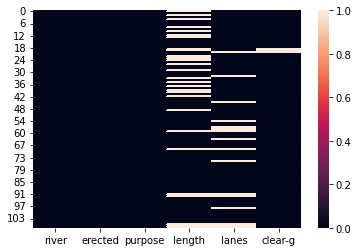

In [ ]:
sns.heatmap(X.isnull());

Widzimy, że nasze dane są mocno wybrakowane w kolumnie długości mostu. W tym celu pozwolę sobie użyć drzewa decyzyjnego do przewidywania brakujących danych (dzieje się tu jakaś rzecz związana z meta-modelowaniem). Znalazłem takie rozwiązanie na internecie i w ziązku z małą ilością danych postanowiłem ja zastosować i z analizować wyniki.

     river  erected  purpose  length  lanes  clear-g
0      1.0        0        3     1.0    2.0      0.0
1      0.0        0        3     1.0    2.0      0.0
2      0.0        0        1     1.0    1.0      0.0
3      0.0        0        3     1.0    2.0      0.0
4      1.0        0        3     1.0    2.0      0.0
..     ...      ...      ...     ...    ...      ...
103    0.0        3        3     0.0    6.0      1.0
104    3.0        3        3     2.0    6.0      1.0
105    1.0        3        3     0.0    6.0      1.0
106    3.0        3        3     2.0    2.0      1.0
107    0.0        3        3     0.0    4.0      1.0

[107 rows x 6 columns]


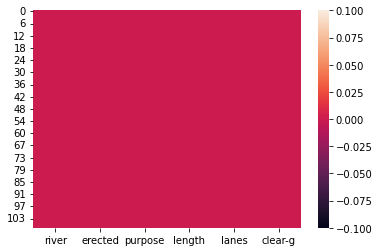

In [ ]:
for x in X:
    if X[x].isnull().sum(axis=0) > 0:
        
        s = X.isnull()
        mask1 = s.sum(axis=0)[s.sum(axis=0) == 0].index.to_list()
        mask2 = s[x].to_numpy()
        
        X_train = X.loc[~mask2, mask1]
        y_train = X.loc[~mask2, x]
        
        X_test = X.loc[mask2, mask1]
        y_test = X.loc[mask2, x]
        
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        X.loc[y_test.index, x] = y_pred
        
print(X)
sns.heatmap(X.isnull());

#FFNN

Ponieważ nasz zbiór jest bardzo mały, na zbiór testowy przeznaczamy 20%. Dla 30% wyniki są znacząco gorsze.

In [ ]:
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, Y_output, test_size=0.20, random_state=42)

In [ ]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
river,85.0,0.952941,1.184281,0.0,0.0,1.0,1.0,4.0
erected,85.0,1.752941,0.962461,0.0,1.0,2.0,2.0,3.0
purpose,85.0,2.576471,0.643215,0.0,2.0,3.0,3.0,3.0
length,85.0,1.070588,0.593381,0.0,1.0,1.0,1.0,2.0
lanes,85.0,2.529412,1.118973,1.0,2.0,2.0,4.0,6.0
clear-g,85.0,0.776471,0.419083,0.0,1.0,1.0,1.0,1.0


In [ ]:
# Chciałem użyć normalizacji dancyh biorąc pod uwagę ich statystyki ale tylko zminiejasz to skuteczność modelu

# def norm(x):
#     return (x - train_stats['mean']) / train_stats['std']
# norm_train_X = np.array(norm(X_train))
# norm_test_X = np.array(norm(X_test))
# norm_val_X = np.array(norm(X_val))
# norm_val_X
# norm_test_X

Tworzę model z przykładu z irysami zmieniam wymiar inputów i liczbę nuronów

In [ ]:
import math
import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.utils import np_utils
hidden_units = 10     # how many neurons in the hidden layer
activation = 'relu'   # activation function for hidden layer
l2 = 0.01             # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 20         # how many epochs to train for
batch_size = 16       # how many samples to use for each gradient descent update

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(20,input_dim=6,activation='relu'))
model.add(Dense(50,activation='relu'))

#Protects against overfitting
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(len(mapa),activation='softmax'))

# Compiling the ANN
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
   epochs=100, batch_size=10,verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 36ms/step - loss: 3.3853 - accuracy: 0.0706 - val_loss: 3.3912 - val_accuracy: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 3.3190 - accuracy: 0.0706 - val_loss: 3.3566 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 3.2734 - accuracy: 0.1059 - val_loss: 3.3207 - val_accuracy: 0.0909
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 3.2551 - accuracy: 0.1529 - val_loss: 3.2832 - val_accuracy: 0.2273
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 3.2172 - accuracy: 0.1647 - val_loss: 3.2465 - val_accuracy: 0.1364
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 3.1342 - accuracy: 0.2000 - val_loss: 3.2089 - val_accuracy: 0.1818
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 3.1049 - accuracy: 0.1647 - val_loss: 3.1632 - val_accuracy: 0.1818
Epoch 8/100
9/9 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


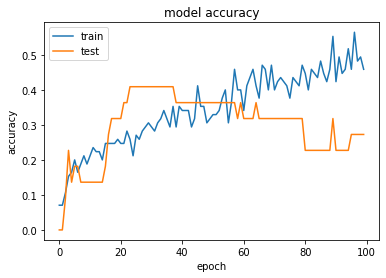

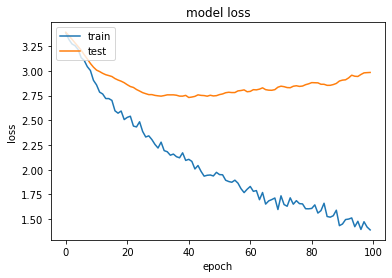

In [ ]:
def accuracy_plot(historyX): 
  print(historyX.history.keys())
  # accuracy
  plt.plot(historyX.history['accuracy'])
  plt.plot(historyX.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  #loss
  plt.plot(historyX.history['loss'])
  plt.plot(historyX.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

accuracy_plot(history)

Walidacja precyzji modelu

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#how times it matched/ how many test cases
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

1/1 [==============================] - 0s 21ms/step
Accuracy of the dataset 27.27272727272727


Po wielu próbach wybrałem najlepsze paramaterty dla sieci.

In [ ]:
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(20,input_dim=6,activation='relu'))
model.add(Dense(50,activation='relu'))

#Protects against overfitting
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(len(mapa),activation='sigmoid'))

# Compiling the ANN
model.compile(loss='binary_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
   epochs=100, batch_size=10,verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 28ms/step - loss: 0.7406 - accuracy: 0.0471 - val_loss: 0.6929 - val_accuracy: 0.0909
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 0.6683 - accuracy: 0.0588 - val_loss: 0.6163 - val_accuracy: 0.0909
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 0.5967 - accuracy: 0.0588 - val_loss: 0.5473 - val_accuracy: 0.0455
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5309 - accuracy: 0.0706 - val_loss: 0.4790 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4553 - accuracy: 0.0471 - val_loss: 0.4089 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3898 - accuracy: 0.0588 - val_loss: 0.3408 - val_accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.3305 - accuracy: 0.0588 - val_loss: 0.2823 - val_accuracy: 0.0000e+00
Epoch 8/10

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


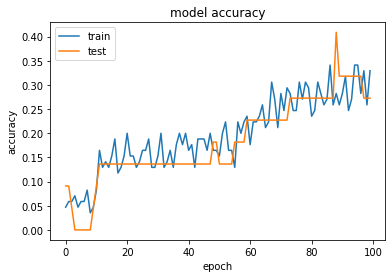

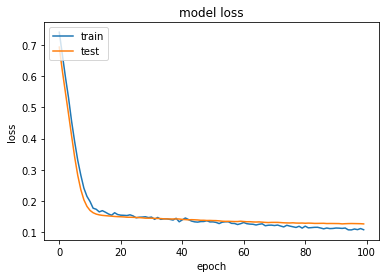

In [ ]:
accuracy_plot(history)

Jak można zauważyć strata znacząco się zmniejszyła w porównaniu do poprzednich parametrów

In [ ]:
print('Wymiary naszych danych: ')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

Wymiary naszych danych: 
(85, 6)
(22, 6)
(85, 30)
(22, 30)


In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#how times it matched/ how many test cases
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

1/1 [==============================] - 0s 21ms/step
Accuracy of the dataset 27.27272727272727


Próba polepszenia wyników przy użyciu cross validation

In [ ]:
training_data_array =np.array(X)
labels_array =  np.array(Y.iloc[:,5:])
#Manual k fold cross validation with F1 score calculation
kfold = StratifiedKFold(n_splits=5, shuffle=True)
cvscores = []
f1scores = []
iteration = 1

for train_index, test_index in kfold.split(training_data_array,labels_array):
    model = Sequential()
    # create model
    model.add(Dense(20,input_dim=6,activation='relu'))
    model.add(Dense(50,activation='relu'))

#Protects against overfitting
    model.add(Dropout(0.2))
#sigmoid
# Adding the output layer
    model.add(Dense(1,activation='softmax'))

# Compiling the ANN
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    #separate train data and test data
    x_train,x_test=training_data_array[train_index],training_data_array[test_index]
    y_train,y_test=labels_array[train_index],labels_array[test_index]
    model.fit(x_train, y_train, epochs=1000, batch_size=100,verbose=0)
    scores = model.evaluate(x_test, y_test, verbose=0)
    cvscores.append(scores[1] * 100)

    #calculate F1 score
    y_pred = model.predict(x_test, batch_size=100, verbose=1)
    y_pred = np.where(y_pred > 0.5, 1, 0)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1scores.append(f1)
    
    iteration = iteration + 1
    
print("Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("F1: %.2f%% (+/- %.2f%%)" % (np.mean(f1scores), np.std(f1scores)))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 56ms/step
Accuracy: 8.40% (+/- 1.83%)
F1: 0.01% (+/- 0.00%)


Precyzja okazała się gorsza

Zmieniam dane kategoryczne tak by jedna wartość przypadała na jeden neuron

In [ ]:
for col in ['river',
            'erected',
            'purpose',
            'clear-g']:
    X[col] = X[col].astype('category')

print(X.dtypes)
X.head()

river      category
erected    category
purpose    category
length      float64
lanes       float64
clear-g    category
dtype: object


,river,erected,purpose,length,lanes,clear-g
0,1.0,0,3,1.0,2.0,0.0
1,0.0,0,3,1.0,2.0,0.0
2,0.0,0,1,1.0,1.0,0.0
3,0.0,0,3,1.0,2.0,0.0
4,1.0,0,3,1.0,2.0,0.0


In [ ]:
X_copy = X.copy()
for i in X_copy.columns:
  if X_copy[i].dtypes == 'category':
    y = pd.get_dummies(X_copy[i], prefix=i)
    X_copy = X_copy.drop(columns = i)
    X_copy = pd.concat([X_copy, y], axis=1)

X_copy

,length,lanes,river_0.0,river_1.0,river_3.0,river_4.0,erected_0,erected_1,erected_2,erected_3,purpose_0,purpose_1,purpose_2,purpose_3,clear-g_0.0,clear-g_1.0
0,1.0,2.0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
1,1.0,2.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
2,1.0,1.0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1.0,2.0,1,0,0,0,1,0,0,0,0,0,0,1,1,0
4,1.0,2.0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.0,6.0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
104,2.0,6.0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
105,0.0,6.0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
106,2.0,2.0,0,0,1,0,0,0,0,1,0,0,0,1,0,1


Kolejna próba poprawy precyzji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, Y_output, test_size=0.30, random_state=42)
import math
import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.utils import np_utils

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(20,input_dim=16,activation='relu'))
model.add(Dense(50,activation='relu'))

#Protects against overfitting
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(len(mapa),activation='sigmoid'))

# Compiling the ANN
model.compile(loss='binary_crossentropy',optimizer='nadam',metrics=['accuracy'])
history = model.fit(X_train, y_train,
   epochs=100, batch_size=20,verbose=1, validation_data=(X_test, y_test))
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
#how times it matched/ how many test cases
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )


Epoch 1/100
4/4 [==============================] - 1s 67ms/step - loss: 0.7383 - accuracy: 0.0811 - val_loss: 0.7163 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7128 - accuracy: 0.0405 - val_loss: 0.6944 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6893 - accuracy: 0.0405 - val_loss: 0.6716 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.6688 - accuracy: 0.0541 - val_loss: 0.6474 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.6459 - accuracy: 0.0270 - val_loss: 0.6215 - val_accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6208 - accuracy: 0.0135 - val_loss: 0.5935 - val_accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5930 - accuracy: 0.0135 - val_loss: 0.5629 - val_accuracy: 0.0

Nic to nie zmieniło, zmiana neuronów w wartwach również nic nie zmienia. Liczba epok czy batch_size też nic nie zmienia. Przypuszczam że zbiór jest mocno niedeterministyczny.

#SOM

In [ ]:
print(X)
print(Y)

    river erected purpose  length  lanes clear-g
0     1.0       0       3     1.0    2.0     0.0
1     0.0       0       3     1.0    2.0     0.0
2     0.0       0       1     1.0    1.0     0.0
3     0.0       0       3     1.0    2.0     0.0
4     1.0       0       3     1.0    2.0     0.0
..    ...     ...     ...     ...    ...     ...
103   0.0       3       3     0.0    6.0     1.0
104   3.0       3       3     2.0    6.0     1.0
105   1.0       3       3     0.0    6.0     1.0
106   3.0       3       3     2.0    2.0     1.0
107   0.0       3       3     0.0    4.0     1.0

[107 rows x 6 columns]
     t-or-d  material  span  rel-l  type  class
0       0.0       0.0   0.0    0.0   0.0      0
1       0.0       0.0   0.0    0.0   0.0      0
2       0.0       0.0   1.0    0.0   0.0      1
3       0.0       0.0   0.0    0.0   0.0      0
4       0.0       0.0   1.0    0.0   0.0      1
..      ...       ...   ...    ...   ...    ...
103     0.0       2.0   1.0    2.0   3.0     13
104 

In [ ]:
!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=cf642d86c493190ec883c3bd084a5e5bbd296001716df6e3c74adb12d9afa504
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


Dzielę zbiory na trenujące i testowe, oraz zamieniam na tablice numpy do pracy z biblioteką MiniSom. Zmiana rozmiaru danych testowych nie ma wpływu na wynik.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y["class"], test_size=0.20, random_state=31)

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
Y_train_np = Y_train.to_numpy()
Y_test_np = Y_test.to_numpy()

Sprawdzam który algorytm da najniższy błąd kwantyzacji

In [ ]:
som = MiniSom(x=12, y=12, input_len=6, sigma=5.0, learning_rate=0.3, random_seed=10,
              neighborhood_function='gaussian',activation_distance="euclidean")
som.random_weights_init(X_train_np)
som.train(X_train_np, 10000, verbose=True)
som = MiniSom(x=12, y=12, input_len=6, sigma=5.0, learning_rate=0.3, random_seed=10,
              neighborhood_function='mexican_hat',activation_distance="euclidean")
som.random_weights_init(X_train_np)
som.train(X_train_np, 10000, verbose=True)
som = MiniSom(x=12, y=12, input_len=6, sigma=5.0, learning_rate=0.3, random_seed=10,
              neighborhood_function='bubble',activation_distance="euclidean")
som.random_weights_init(X_train_np)
som.train(X_train_np, 10000, verbose=True)
som = MiniSom(x=12, y=12, input_len=6, sigma=5.0, learning_rate=0.3, random_seed=10,
              neighborhood_function='triangle',activation_distance="euclidean")
som.random_weights_init(X_train_np)
som.train(X_train_np, 10000, verbose=True)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.6464329821255805
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 1.257424889420024
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.2729073896061384
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.1667719145867018


Zauważam że najmniejszy błąd jest przy funkcji bubble, będę jej używał

In [ ]:
som = MiniSom(x=12, y=12, input_len=6, sigma=1, learning_rate=0.3, random_seed=10,
              neighborhood_function='bubble',activation_distance="euclidean")

som.random_weights_init(X_train_np)
som.train(X_train_np, 30000, verbose=True)

 [ 30000 / 30000 ] 100% - 0:00:00 left 
 quantization error: 0.038809532622510315


Sprawdzam precyzję

In [ ]:
def classify(som, data, Xtrain, Ytrain):
    winmap = som.labels_map(Xtrain, Ytrain)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

print(metrics.classification_report(Y_test_np, classify(som, X_test_np, X_train_np, Y_train_np)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.20      0.50      0.29         2
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          12       0.75      0.33      0.46         9
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          24       1.00      1.00      1.00         1
          25       0.00      0.00      0.00         0

    accuracy                           0.27        22
   macro avg       0.20      0.19      0.18        22
weighted avg       0.42   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Prezycja jest bardzo niska, poprzez małą ilość rekordów danych oraz dużą ilość klas wyjściowych. Najlepsza jest przy sigmie równej 1, mniejsza wartość nie zmienia precyzji.

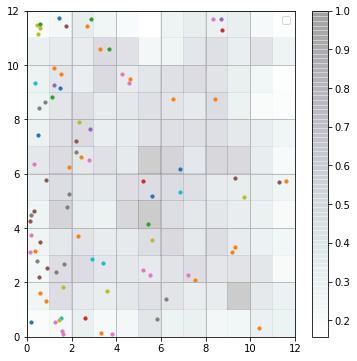

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in X_train_np])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(6, 6))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(Y_train_np):
    idx_target = Y_train_np==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, s=10)

plt.legend(loc='upper right')
plt.grid()
plt.show()

#Podsumowanie

Dane są bardzo wybrakowane, przez co ciężko się na nich pracuje. Nie ma znaczącej różnicy pomiędzy zastowanymi sieciami neuronowymi. Nie jest to problem przeznaczony do tego typu klasyfikacji danych.